### Шаг 1. Открываем файлы с данными и изучаем общую информацию

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

#### Посмотрим отдельно на таблички

### 1. Звонки: 'calls'
 - Данные по датам загруженны за весь 2018 год - 365 дней
 - Клиентов 492 - по **'user_id'**
 - Всего строк 202 607, из них 39 613 звонков с нулями в продолжительности времени звонка.
 ---
- [ ]  <span style="color:blue">***call_date*** Поле - заменить на формат Дата

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


### 2. Интернет: 'internet'
 - 149 396 строк
 ---
- [ ]  <span style="color:blue">***Unnamed: 0*** Залетное поле - просто удалить
- [ ]  <span style="color:blue">***session_date*** Перевести в формат - Дата

In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


### 3. Сообщения: 'messages'
 - 123 036 строк
 ---
- [ ]  <span style="color:blue">***message_date*** Перевести в формат - Дата

In [8]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### 4. Тарифы: 'tariffs'
 - Табличка с описаниями тарифов - изменений не требуется

In [10]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### 5. Пользователи: 'users'
 - 500 строк
 ---
- [ ]  <span style="color:blue">***churn_date*** Прекращение пользования тарифом, Перевести в формат - Дата
- [ ]  <span style="color:blue">***reg_date*** Дата подключения тарифа, Перевести в формат - Дата

In [12]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Итого по Шагу 1
Данные корректные особой обработки не требуют за исключением перевода в формат даты и удаления ненужного столбца
- **'calls'**
- [ ]  <span style="color:blue">***call_date*** Поле - заменить на формат Дата
---    
- **'internet'**   
- [ ]  <span style="color:blue">***Unnamed: 0*** Залетное поле - просто удалить
- [ ]  <span style="color:blue">***session_date*** Перевести в формат - Дата
---   
- **'messages'**   
- [ ]  <span style="color:blue">***message_date*** Перевести в формат - Дата
---
- **'users'**    
- [ ]  <span style="color:blue">***churn_date*** Прекращение пользования тарифом, Перевести в формат - Дата
- [ ]  <span style="color:blue">***reg_date*** Дата подключения тарифа, Перевести в формат - Дата

-------------------------------------------------------------------------------------------------------------------------------

### Шаг 2. Подготовка данных

#### 1. Приведение данных к нужным типам

In [14]:
# Переводим в дату
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

#### 2. Исправление ошибок

In [15]:
# Удаляем столбец Unnamed: 0
del internet['Unnamed: 0']

In [16]:
# Округляем до минуты длительность звонка и переводим в формат 'int'
calls['ceil_duration'] = np.ceil(calls.duration).astype('int')

In [17]:
calls.head()

,id,call_date,duration,user_id,ceil_duration
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id               202607 non-null object
call_date        202607 non-null datetime64[ns]
duration         202607 non-null float64
user_id          202607 non-null int64
ceil_duration    202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


#### 3. Найденные ошибки и их исправление

- Нулевые звонки расположены равномерно по всем абонентам и составляют примерно 20%, видимо звонили и не дозвонились.
- Удалять такое большое кол-во звонков пока не имеет смысла, т.к. сумма удаления слишком большая. И при необходимости можно   пустые звонки не брать в расчет отсекая их фильтром.

In [19]:
# Добавим столбец 'Null_time' обозначающий нулевые звонки
calls.loc[calls['duration'] == 0.00, 'Null_time'] = 'zero'
calls['Null_time'] = calls['Null_time'].fillna('good_calls')

In [20]:
calls.head()

,id,call_date,duration,user_id,ceil_duration,Null_time
0,1000_0,2018-07-25,0.00,1000,0,zero
1,1000_1,2018-08-17,0.00,1000,0,zero
2,1000_2,2018-06-11,2.85,1000,3,good_calls
3,1000_3,2018-09-21,13.80,1000,14,good_calls
4,1000_4,2018-12-15,5.18,1000,6,good_calls


In [21]:
# Посмотрим на наличие нулевых звонков у всех клиентов
pvt=(calls.pivot_table(index='user_id', 
                       columns='Null_time', 
                       values='id', 
                       aggfunc='count', 
                       margins=True, 
                       margins_name='all_calls')
.sort_values(by='good_calls', ascending=False))

In [22]:
pvt['procent'] = pvt['zero']/pvt['all_calls']

In [23]:
pvt.head()

Null_time,good_calls,zero,all_calls,procent
user_id,,,,
all_calls,162994,39613,202607,0.195516
1377,1424,336,1760,0.190909
1168,1384,308,1692,0.182033
1375,1270,290,1560,0.185897
1453,1145,295,1440,0.204861


#### 4. Расчеты для каждого пользователя

#### a) Работаем со Звонками
 - создаем переменную с группированными данными по звонкам: **agg_calls**
 - Сгруппируем пользователей по месяцам и получим Минуты за месяц и Кол-во звонков за месяц
 - Нулевые звонки считать не будем

In [24]:
# Добавляем месяц
calls['month'] = calls.call_date.dt.month

In [25]:
# Убираем нулевые звонки, Группируем, Переименовываем и Сортируем
agg_calls = calls.query("Null_time=='good_calls'") \
                 .groupby(by=['user_id', 'month'], as_index=False)\
                 .agg({'ceil_duration':'sum', 'id':'count'})\
                 .rename(columns={'ceil_duration':'sum_dur', 'id':'qty_call'})\
                 .sort_values('sum_dur', ascending=False)
agg_calls.head()

,user_id,month,sum_dur,qty_call
2966,1467,12,1673,190
2353,1377,3,1609,165
1359,1216,12,1435,162
1237,1196,6,1410,149
2360,1377,10,1401,148


#### b) Сделаем тоже самое, но с сообщениями
- **agg_messages**

In [26]:
# Добавляем месяц
messages['month'] = messages.message_date.dt.month

In [27]:
# Группируем, убираем индекс, Переименовываем и сортируем
agg_messages = messages.groupby(by=['user_id', 'month'], as_index=False)\
                       .agg({'id':'count'})\
                       .rename(columns={'id':'qty_sms'})\
                       .sort_values('qty_sms', ascending=False)
agg_messages.head()

,user_id,month,qty_sms
866,1165,12,224
154,1028,10,223
1197,1231,7,211
1196,1231,6,201
865,1165,11,197


#### c) Объем Интернет трафика
- **agg_internet**

In [28]:
# Добавляем месяц
internet['month'] = internet.session_date.dt.month

In [29]:
# Группируем, убираем индекс, Переименовываем и сортируем
agg_internet = internet.groupby(by=['user_id', 'month'], as_index=False)\
                       .agg({'mb_used':'sum'})\
                       .rename(columns={'mb_used':'sum_mb'})\
                       .sort_values('sum_mb', ascending=False)
agg_internet.head()

,user_id,month,sum_mb
799,1124,10,49745.69
1524,1240,8,48351.59
1622,1255,7,45180.71
1901,1300,11,44296.86
383,1060,12,43931.36


#### d) Выручка с каждого пользователя

In [30]:
# Объеденяем все данные в одну табличку 'full_data'
# Звонки + Интернет + Сообщения
# И добавляем ко всему этому данные по Пользователям

full_data = agg_calls.merge(agg_internet, on=['user_id', 'month'], how='outer')
full_data = full_data.merge(agg_messages, on=['user_id', 'month'], how='outer')
full_data = full_data.merge(users, on='user_id', how='left')

In [31]:
# Заменяем пустоты на нули, там где это необходимо
values = {'sum_dur':0, 'qty_call':0, 'sum_mb':0, 'qty_sms':0}
full_data = full_data.fillna(value=values)

In [32]:
# Переводим 'qty_call' и 'qty_sms' в формат 'int'
full_data = full_data.astype({'sum_dur': 'int64', 'qty_call': 'int64', 'qty_sms': 'int64'})

In [33]:
# Добавляем поле с индексом 'tariffs'
tariffs.index = tariffs.tariff_name
tariffs.index.names = ['tariff']

In [34]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
tariff,,,,,,,,
smart,50,15360,500,550,200,3,3,smart
ultra,1000,30720,3000,1950,150,1,1,ultra


In [35]:
def month_payment_calculation(row):
    """ Считаем доходность по Клиентам в разрезе месяцев"""
    # Закидываем данные в переменные
    short_min = row['sum_dur']
    short_message = row['qty_sms']
    short_internet = row['sum_mb']
    tariff = row['tariff']
    
    # допустим мы храним лимиты по тарифам в отдельной табличке, где индекс - название тарифа. достаем
    minutes_lim = tariffs.loc[tariff, 'minutes_included']
    mess_lim = tariffs.loc[tariff, 'messages_included']
    inter_lim = tariffs.loc[tariff, 'mb_per_month_included']
    
    # вычисляем переплату по звонкам.
    call_overlimit = max(short_min - minutes_lim, 0)
    call_overpay = call_overlimit * tariffs.loc[tariff, 'rub_per_minute']
    
    # вычисляем переплату по сообщениям.
    message_overlimit = max(short_message - mess_lim, 0)
    message_overpay = message_overlimit * tariffs.loc[tariff, 'rub_per_message']
    
    # вычисляем переплату по интернету.
    inter_overlimit = max(short_internet - inter_lim, 0)
    inter_overpay = np.ceil(inter_overlimit/1024) * tariffs.loc[tariff, 'rub_per_gb']    

    # где-то в конце должен быть return с суммарной стоимостью денег, что пользователь должен заплатить за этот месяц
    return (call_overpay + message_overpay + inter_overpay)

# Проверка работоспособности функции
month_payment_calculation(full_data.loc[336])

950.0

In [36]:
full_data.loc[336]

user_id                      1282
month                           2
sum_dur                       747
qty_call                       80
sum_mb                    15680.3
qty_sms                        53
age                            59
churn_date                    NaT
city                    Ульяновск
first_name                  Артём
last_name                Аракчеев
reg_date      2018-01-21 00:00:00
tariff                      smart
Name: 336, dtype: object

In [37]:
# Ручная проверка переплат, по user 1282
(747-500)*3 + np.ceil((15680.3-15360)/1024)*200 + (53-50)*3

950.0

In [38]:
# Добавляем столбец с переплатами
full_data['overpay'] = full_data.apply(month_payment_calculation, axis=1)

In [39]:
# Добавим Ежемесячный платеж
full_data = full_data.merge(tariffs['rub_monthly_fee'], on='tariff', how='left')

In [40]:
# И рассчитаем итоговую выручку с пользователя в месяц
full_data['revenue'] = full_data['rub_monthly_fee'] + full_data['overpay']

In [41]:
full_data.head()

,user_id,month,sum_dur,qty_call,sum_mb,qty_sms,age,churn_date,city,first_name,last_name,reg_date,tariff,overpay,rub_monthly_fee,revenue
0,1467,12,1673,190,9756.90,39,66,NaT,Киров,Исак,Александрюк,2018-11-24,ultra,0.0,1950,1950.0
1,1377,3,1609,165,3059.85,20,59,NaT,Брянск,Альфред,Семин,2018-02-25,ultra,0.0,1950,1950.0
2,1216,12,1435,162,20066.05,64,74,NaT,Волгоград,Рустам,Малинин,2018-11-23,smart,3847.0,550,4397.0
3,1196,6,1410,149,22652.05,153,25,NaT,Воронеж,Фёдор,Чернышев,2018-05-28,ultra,0.0,1950,1950.0
4,1377,10,1401,148,4880.62,10,59,NaT,Брянск,Альфред,Семин,2018-02-25,ultra,0.0,1950,1950.0


### Шаг 3. Анализ данных

#### 3.0. Посмотрим распределение данных

Text(0.5, 0, 'Минут в месяц')

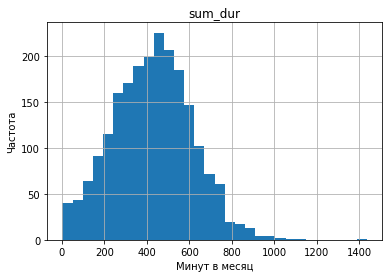

In [42]:
# Сначала по тарифу 'smart'
smart = full_data.query('tariff == "smart" & month>2 & sum_dur > 0')
smart.hist('sum_dur', bins=30)
plt.ylabel("Частота")
plt.xlabel("Минут в месяц")

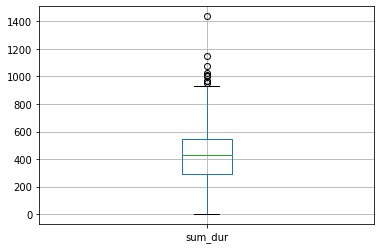

In [43]:
smart.boxplot(column='sum_dur')

Text(0.5, 0, 'Минут в месяц')

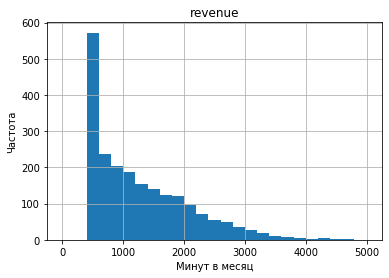

In [44]:
smart = full_data.query('tariff == "smart" & month>2 & sum_dur > 0')
smart.hist('revenue', bins=25, range=(0, 5000))
plt.ylabel("Частота")
plt.xlabel("Минут в месяц")

In [45]:
np.std(smart['revenue'], ddof=1)

823.3646117331789

- Данные по тарифу **smart** по минутам разговора скошены в левую сторону, относительно нормального распределения
- Есть некоторые значения, которые выпадают из диапазона 3х сигм
- Большинство абонентов платит только абонентскую плату в 550р.

Text(0.5, 0, 'Минут в месяц')

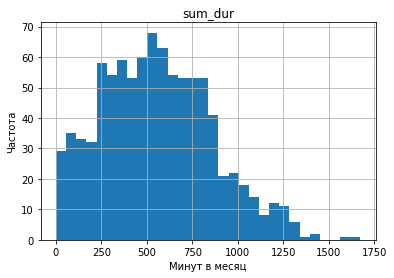

In [46]:
# Теперь посмотрим тариф 'ultra'
ultra = full_data.query('tariff == "ultra" & month>2 & sum_dur > 0')
ultra.hist('sum_dur', bins=30)
plt.ylabel("Частота")
plt.xlabel("Минут в месяц")

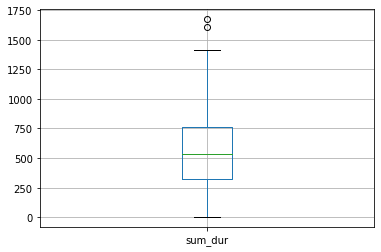

In [47]:
ultra.boxplot(column='sum_dur')

- В тарифе **ultra** в абонентскую сумму входит 3000 минут разговора. Столько в месяц никто не выговаривает, в основном все говорят от 250 до 800 минут в месяц.
- распределение смещено в право

In [48]:
full_data.head()

,user_id,month,sum_dur,qty_call,sum_mb,qty_sms,age,churn_date,city,first_name,last_name,reg_date,tariff,overpay,rub_monthly_fee,revenue
0,1467,12,1673,190,9756.90,39,66,NaT,Киров,Исак,Александрюк,2018-11-24,ultra,0.0,1950,1950.0
1,1377,3,1609,165,3059.85,20,59,NaT,Брянск,Альфред,Семин,2018-02-25,ultra,0.0,1950,1950.0
2,1216,12,1435,162,20066.05,64,74,NaT,Волгоград,Рустам,Малинин,2018-11-23,smart,3847.0,550,4397.0
3,1196,6,1410,149,22652.05,153,25,NaT,Воронеж,Фёдор,Чернышев,2018-05-28,ultra,0.0,1950,1950.0
4,1377,10,1401,148,4880.62,10,59,NaT,Брянск,Альфред,Семин,2018-02-25,ultra,0.0,1950,1950.0


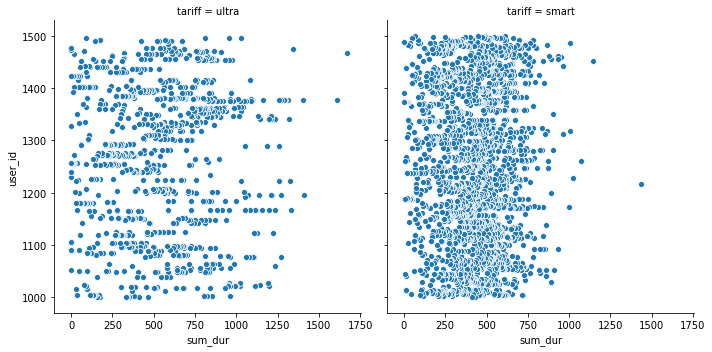

In [49]:
sns.relplot('sum_dur', 'user_id', data=full_data, col='tariff')

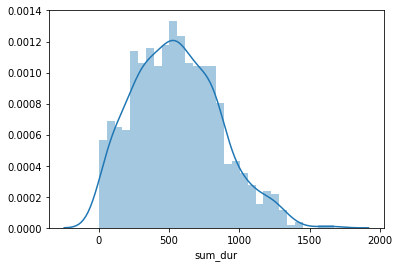

In [50]:
ax = sns.distplot(full_data.
                  query('tariff == "ultra" & month>2 & sum_dur > 0')['sum_dur'], 
                  #kde=False,
                 bins=30)

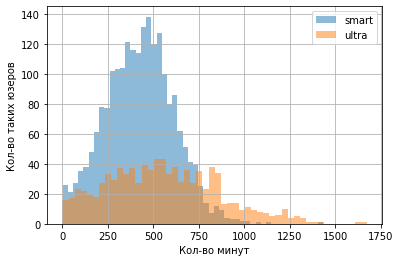

In [52]:
ax = full_data.query('tariff == "smart" & month>2 & sum_dur > 0')['sum_dur'].hist(bins=50, alpha=0.5, label = 'smart') 
full_data.query('tariff == "ultra" & month>2 & sum_dur > 0')['sum_dur'].hist(bins=50, alpha=0.5, label = 'ultra') 

ax.set_ylabel('Кол-во таких юзеров')
ax.set_xlabel('Кол-во минут')
ax.legend()

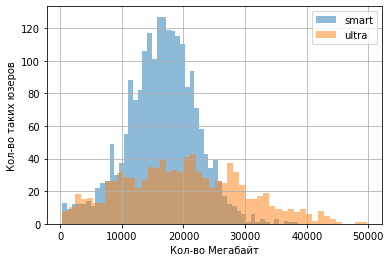

In [53]:
ax = full_data.query('tariff == "smart"& month>2 & sum_mb > 0')['sum_mb'].hist(bins=50, alpha=0.5, label = 'smart') 
full_data.query('tariff == "ultra"& month>2 & sum_mb > 0')['sum_mb'].hist(bins=50, alpha=0.5, label = 'ultra') 

ax.set_ylabel('Кол-во таких юзеров')
ax.set_xlabel('Кол-во Мегабайт')
ax.legend()

По кол-ву потребления мегабайт можно сказать что пользователи тарифа **smart** в большинстве своем расходуют от 10-20 гб в месяц, в то время как абоненты тарифа **ultra** расположены более полого и потребление трафика варьируется в диапазоне от 7-25 гб с пиком на 22 гб.

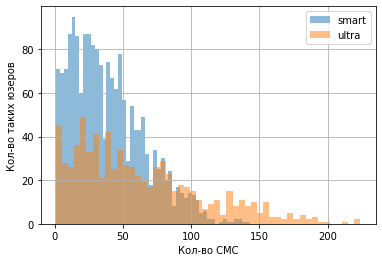

In [54]:
ax = full_data.query('tariff == "smart" & qty_sms>0 & month>2')['qty_sms'].hist(bins=50, alpha=0.5, label = 'smart') 
full_data.query('tariff == "ultra" & qty_sms>0 & month>2')['qty_sms'].hist(bins=50, alpha=0.5, label = 'ultra') 

ax.set_ylabel('Кол-во таких юзеров')
ax.set_xlabel('Кол-во СМС')
ax.legend()

По кол-ву СМС можно сделать вывод что пользователи тарифа **ultra** в большинстве своем на пользуются всего 100 сообщениями в месяц при возможных 1000.

#### 3.1. Для начала усредним данные по Тарифам и месяцам
- Посчитаем Среднее
- Суммарное кол-во пользователей
- Переведем мегабайты в ГБ

In [69]:
full_data.columns

Index(['user_id', 'month', 'sum_dur', 'qty_call', 'sum_mb', 'qty_sms', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff',
       'overpay', 'rub_monthly_fee', 'revenue'],
      dtype='object')

In [70]:
mean_data = round(full_data\
  .groupby(by=['tariff', 'month'], as_index=False)\
  .agg({'sum_dur':'mean', 'qty_sms':'mean', 'sum_mb':'mean', 'user_id':'sum', 'overpay':'mean', 'revenue':'mean'})\
  .rename(columns={'sum_dur':'call_mean', 'qty_sms':'sms_mean', 'sum_mb':'gb_mean', 'user_id':'user_qty'}))
mean_data['gb_mean'] = (mean_data['gb_mean']/1024).round(1)

In [76]:
Osn_pokazately = round(full_data.query('month > 2')
      .groupby(by='tariff')[['sum_dur', 'qty_sms', 'sum_mb']]
      .agg(['mean', 'var', 'std']).stack()
      .rename(columns={'sum_dur':'call', 'qty_sms':'sms', 'sum_mb':'mb'}))

In [75]:
Osn_pokazately.reset_index().rename(columns={'level_1':'agg'}).sort_values(by='agg')

,tariff,agg,call,sms,mb
0,smart,mean,425.0,34.0,16456.0
3,ultra,mean,533.0,50.0,19723.0
2,smart,std,188.0,28.0,5717.0
5,ultra,std,316.0,48.0,10010.0
1,smart,var,35280.0,808.0,32682469.0
4,ultra,var,100169.0,2317.0,100207995.0


#### 3.2. Строим графики и смотрим на данные 

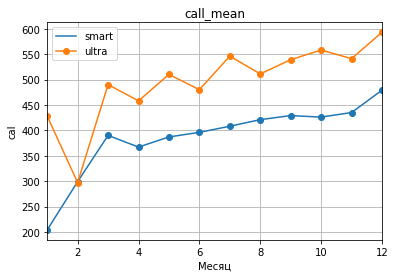

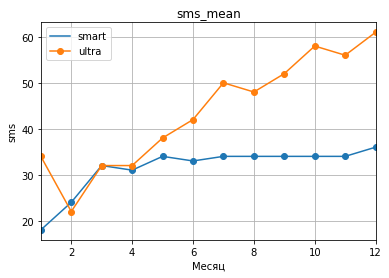

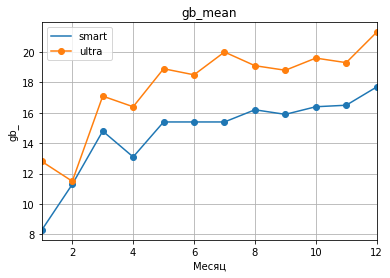

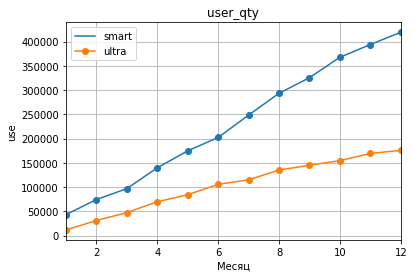

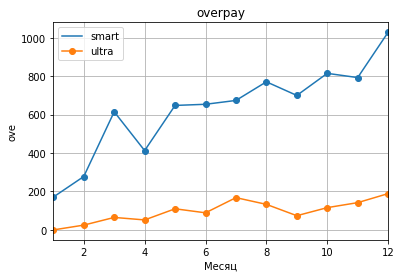

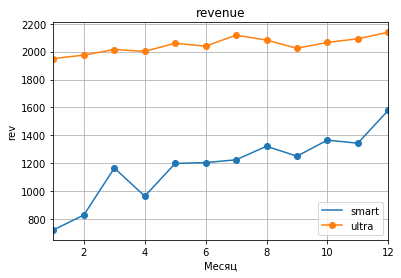

In [68]:
for col in ['call_mean', 'sms_mean', 'gb_mean', 'user_qty', 'overpay', 'revenue']:
    ax = mean_data.query('tariff == "smart"').plot(x='month', y=col, style='o-', grid=True, label='smart')
    mean_data.query('tariff == "ultra"').plot(x='month', y=col, style='o-', grid=True, label='ultra', ax=ax, title=col)
    ax.set_xlabel('Месяц')
    ax.set_ylabel(col[0:3])





- Можно отметить что оба тарифа скорее всего были запущены в январе, судя по 2х кратному приросту в последующие месяцы
- Плюс некая стабилизация результатов на одного пользователя с марта
- По тарифу **smart** пользователи интернета почти полностью его расходуют, тогда как пользователи тарифа **ultra** используют трафик примерно на 2/3 от максимума
- Кол-во пользователей **smart** больше чем пользователей **ultra** в 2 раза
- По уровню выручки на одного пользователя более интересен пользователь тарифа **ultra**
- Возможно стоит перетягивать клиентов на тариф **ultra**, особенно тех по которым есть существенные переплаты
- Либо в качестве маркетинговой акции снизить стоимость тарифа **ultra**, предварительно рассчитав стоимость повышенных затрат на более высокое потребление минут, смс и гб
- В Ультра очень странное увеличение кол-ва смс каждый месяц, но объем смс не такой существенный

#### 3.3. Сравниваем тарифы, смотрим Стандартное отклонение и Дисперсию

In [57]:
# Убираем январь и февраль из рассмотрения и получаем аггрегированные данные по тарифам
mean_data.columns

Index(['tariff', 'month', 'call_mean', 'sms_mean', 'gb_mean', 'user_qty',
       'overpay', 'revenue'],
      dtype='object')

In [58]:
mean_var_std = round(mean_data.query('month > 2')
      .groupby(by='tariff')[['call_mean', 'sms_mean', 'gb_mean']]
      .agg(['mean', 'var', 'std']).stack()
      .rename(columns={'call_mean':'call', 'sms_mean':'sms', 'gb_mean':'gb'}))

In [59]:
mean_var_std.reset_index().rename(columns={'level_1':'agg'}).sort_values(by='agg')

,tariff,agg,call,sms,gb
0,smart,mean,414.0,34.0,16.0
3,ultra,mean,523.0,47.0,19.0
2,smart,std,32.0,1.0,1.0
5,ultra,std,40.0,10.0,1.0
1,smart,var,995.0,2.0,1.0
4,ultra,var,1634.0,110.0,2.0


- Пользователям тарифа **ultra** явно не нужно столько времени на телефонные разговоры, время общения по телефону у них на 20% превышает время общения по тарифу **smart**

### Шаг 4. Проверка гипотез

#### Проверяем гипотизу о том что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Формулируем нулевую гипотизу
- H0 - Средняя выручка по тарифам «Ультра» и «Смарт» одинакова
- H1 - Средняя выручка по тарифам разная.

In [60]:
# Возьмем уровень alpha = 0.05 что будет соответствовать 95% точности результата
# Сравним 2 тарифа

alpha = .05

results = st.ttest_ind(
    smart['revenue'],
    ultra['revenue'])

print('smart - среднее значение', (smart['revenue'].mean()).round(1))
print('smart - медианное значение', (smart['revenue'].median()).round(1))
print('ultra - среднее значение', (ultra['revenue'].mean()).round(1))
print('ultra - медианное значение', (ultra['revenue'].median()).round(1))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

smart - среднее значение 1312.5
smart - медианное значение 1078.5
ultra - среднее значение 2075.1
ultra - медианное значение 1950.0
p-значение: 4.929185557356966e-142
Отвергаем нулевую гипотезу


#### Отличие в тарифах очень очевидно, выручка по тарифу 'ultra' существенно выше чем по тарифу 'smart'
- Дополнительная проверка по среднему и медиане подтверждает различие выручки в тарифах

#### Проверяем гипотизу о том что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Т.к. мы уже выяснили что выручка по тарифам отличается логичнее всего сравнивать Москву и Другие регионы так-же по тарифам

In [61]:
# Формируем выборки по Москве и другим городам по тарифу 'smart'
moscow_smart_data = full_data.query('city == "Москва" & tariff == "smart"')
regions_smart_data = full_data.query('city != "Москва" & tariff == "smart"')

Формулируем нулевую и альтернативную гипотизу
- H0 - Средняя выручка по тарифу «smart» в Москве и Других регионах одинаковая
- H1 - Средняя выручка в Москве и Регионах по тарифу «smart» - разная

In [62]:
alpha = .05

results = st.ttest_ind(
    moscow_smart_data['revenue'],
    regions_smart_data['revenue'])

print('Москва - среднее значение', (moscow_smart_data['revenue'].mean()).round(1))
print('Москва - медианное значение', (moscow_smart_data['revenue'].median()).round(1))
print('Регион - среднее значение', (regions_smart_data['revenue'].mean()).round(1))
print('Регион - медианное значение', (regions_smart_data['revenue'].median()).round(1))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Москва - среднее значение 1239.4
Москва - медианное значение 1007.5
Регион - среднее значение 1300.6
Регион - медианное значение 1039.0
p-значение: 0.18150864159228705
Не получилось отвергнуть нулевую гипотезу


#### Итого: Выручка по тарифу 'smart' в Москве и Регионах примерно одинаковая

Сделаем проверку в Москве и Регионах по второму тарифу: **'ultra'**

Формулируем нулевую и альтернативную гипотизу
- H0 - Средняя выручка по тарифу «ultra» в Москве и Других регионах одинаковая
- H1 - Средняя выручка в Москве и Регионах по тарифу «ultra» - разная

In [63]:
# Формируем выборки по Москве и другим городам по тарифу 'smart'
moscow_ultra_data = full_data.query('city == "Москва" & tariff == "ultra"')
regions_ultra_data = full_data.query('city != "Москва" & tariff == "ultra"')

In [64]:
alpha = .05

results = st.ttest_ind(
    moscow_ultra_data['revenue'],
    regions_ultra_data['revenue'])

print('Москва - среднее значение', (moscow_ultra_data['revenue'].mean()).round(1))
print('Москва - медианное значение', (moscow_ultra_data['revenue'].median()).round(1))
print('Регион - среднее значение', (regions_ultra_data['revenue'].mean()).round(1))
print('Регион - медианное значение', (regions_ultra_data['revenue'].median()).round(1))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Москва - среднее значение 2074.0
Москва - медианное значение 1950.0
Регион - среднее значение 2069.0
Регион - медианное значение 1950.0
p-значение: 0.8614477943640767
Не получилось отвергнуть нулевую гипотезу


Аналогично и по тарифу 'ultra' не удалось отвергнуть нулевую гипотизу. Сумма оплаты по тарифам в Москве и Регионах одинаковая.

#### Обовнование выбора теста для проверки гипотезы такое:
- Т.к. мы использует выборки из генеральной совокупности и предпологаем что абоненты в них разные то нужно использовать именно такой метод st.ttest_ind().
- Если бы мы сравнивали одних и тех же клиентов до и после, то нужно было-бы использовать scipy.stats.ttest_rel()
- И у нас не одна выборка а две. Для одной можно было-бы использовать метод: scipy.stats.ttest_1samp()

### Итоги

1. Больше всего выручки на одного абонента приносит тариф **'ultra'** 2075р vs 1313р. по тарифу 'smart'
2. Но тариф 'smart' генерирует новых клиентов в 2 раза больше. Так при одинаковом запуске этих 2х тарифов кол-во абонентов на конец года по тарифу 'smart' было = 328 а по тарифу 'ultra' = 134.
3. Абоненты тарифа 'smart' в 2 раза переплачивают за свой тариф, так при абонентской плате в месяц в 550р. средняя переплата составляет 739р.
4. Пользователи тарифа **smart** почти полностью израсходуют интернет, тогда как пользователи тарифа **ultra** используют трафик примерно на 2/3 от максимума
5. Возможно стоит перетягивать клиентов на тариф **ultra**, особенно тех по которым есть существенные переплаты в тарифе **smart**
6. Либо в качестве маркетинговой акции снизить стоимость тарифа **ultra**, предварительно рассчитав стоимость повышенных затрат на более высокое потребление минут, смс и гб
7. Выручка в Москве и Регионах по обоим тарифам примерно одинаковая

In [65]:
# Активные клиенты по тарифу "smart"
len(full_data.query('tariff == "smart"')['user_id'].unique())\
- len(full_data.query('tariff == "smart" & churn_date==churn_date')['user_id'].unique())

328

In [66]:
# Средняя переплата в месяц по тарифу "smart"
full_data.query('tariff == "smart"')['overpay'].mean()

739.9735307312696

In [67]:
# Активные клиенты по тарифу "ultra"
len(full_data.query('tariff == "ultra"')['user_id'].unique())\
- len(full_data.query('tariff == "ultra" & churn_date==churn_date')['user_id'].unique())

134